In [808]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [929]:
class Perceptron(object):
    def __init__(self, n, lr=0.1, epochs=100):
        #agregar sesgo
        self.W = np.random.rand(n+1)
        self.epochs = epochs
        self.lr = lr
    
    def activation_fn(self, x):
        return 1 if x >= 0 else 0
 
    def predict(self, x):
        z = self.W.dot(x)
        a = self.activation_fn(z)
        return a
 
    def fit(self, X, y):
        for _ in range(self.epochs):
            for i in range(y.shape[0]):
                y_ = self.predict(X[i])
                e = y[i] - y_
                self.W = self.W + self.lr * e * X[i]

In [952]:
def plot(X,Y,W,title):
    plt.title(title)
    plt.xlim([-1,2])
    plt.ylim([-0.5,1.5])
    x = np.arange(-2,3,0.1)
    y = ((-1 * W[1] / W[0]) * x) + (-1 * W[2] / W[0])
    plt.scatter(X[:,0],X[:,1],c=Y,cmap="prism")
    plt.plot(x, y)
    plt.show()

parametros and [ 0.12682559  0.20751522 -0.26304551]


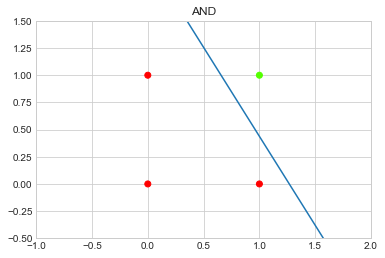

parametros or [ 0.65676488  0.98890192 -0.03568828]


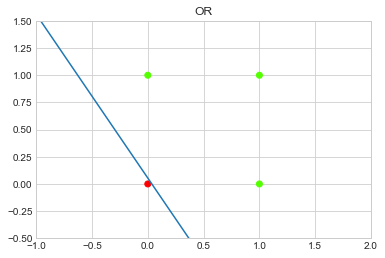

parametros not [ 0.20856898 -0.31523723]


In [954]:
#entrenar perceptron para and
#agregar x con bias
X = np.array([[1,1,1],[1,0,1],[0,1,1],[0,0,1]])

and_y = np.array([[1],[0],[0],[0]])
or_y = np.array([[1],[1],[1],[0]])

perceptron_and = Perceptron(n=2)
perceptron_and.fit(X, and_y)

#or
perceptron_or = Perceptron(n=2)
perceptron_or.fit(X, or_y)

#not
perceptron_not = Perceptron(n=1)
perceptron_not.fit(np.array([[1,1],[1,0]]), np.array([[0],[1]]))

print("parametros and",perceptron_and.W)
plot(X,and_y,perceptron_and.W, "AND")
print("parametros or",perceptron_or.W)
plot(X,or_y,perceptron_or.W, "OR")
print("parametros not",perceptron_not.W)

In [955]:
def _not(x1):
    parametros = [-1 , 1 ]
    #agregar bias
    return perceptron_not.predict([1,x1])
    #return  int(x1*parametros[0]  +  parametros[1]>0)

In [956]:
def _or(x1,x2):
    parametros = [1,0]
    #agregar bias
    return perceptron_or.predict([x1,x2,1])
    #return  int(x1*parametros[0]  + x2*parametros[1] + parametros[2] > 0)

In [957]:
def _and(x1,x2):
    parametros = [1,-1,1]
    #agregar bias
    return perceptron_and.predict([x1,x2,1])
    #return  int(x1*parametros[0]  + x2*parametros[1] + parametros[2] > 0)

In [958]:
def _xor(x1,x2):
    #temp1 = _and(x1,x2)
    #temp2 = _or(x1,x2)
    #nand_temp = _not(temp1)
    #temp_3 = _and(nand_temp,temp2)
    xor = _and(_not(_and(x1,x2)),_or(x1,x2))

    return xor

In [966]:
x0 = 0
x1 = 1
_xor(x0,x1)

1